<a href="https://colab.research.google.com/github/Umerfarooq122/Where-do-minerals-come-from/blob/main/Where_do_minerals_come_from.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Where do minerals comes from?**

In [ ]:
!pip install geopandas
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
from datetime import datetime
import squarify

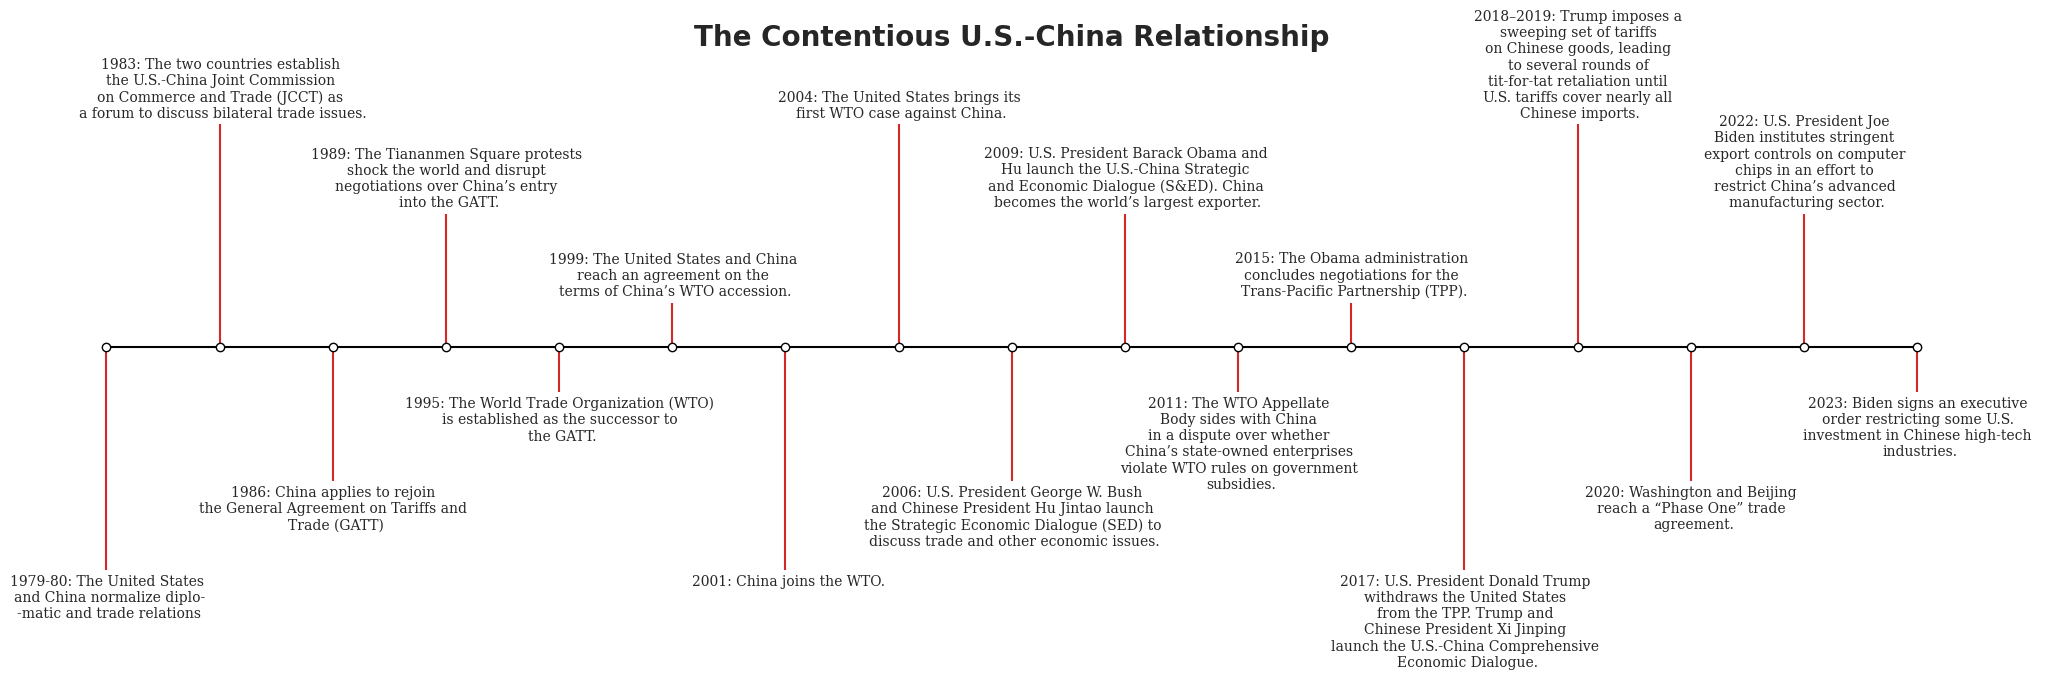

In [ ]:
df = pd.DataFrame(
    {
        'event': ['1979-80: The United States \nand China normalize diplo-\n-matic and trade relations', '1983: The two countries establish \nthe U.S.-China Joint Commission \non Commerce and Trade (JCCT) as \na forum to discuss bilateral trade issues.',
                  '1986: China applies to rejoin \nthe General Agreement on Tariffs and \nTrade (GATT)','1989: The Tiananmen Square protests \nshock the world and disrupt \nnegotiations over China’s entry \ninto the GATT.',
                  '1995: The World Trade Organization (WTO) \nis established as the successor to \nthe GATT.','1999: The United States and China \nreach an agreement on the \nterms of China’s WTO accession.',
                  '2001: China joins the WTO.','2004: The United States brings its \nfirst WTO case against China.','2006: U.S. President George W. Bush \nand Chinese President Hu Jintao launch \nthe Strategic Economic Dialogue (SED) to \ndiscuss trade and other economic issues.',
                  '2009: U.S. President Barack Obama and \nHu launch the U.S.-China Strategic \nand Economic Dialogue (S&ED). China \nbecomes the world’s largest exporter.','2011: The WTO Appellate \nBody sides with China \nin a dispute over whether \nChina’s state-owned enterprises \nviolate WTO rules on government \nsubsidies.',
                  '2015: The Obama administration \nconcludes negotiations for the \nTrans-Pacific Partnership (TPP).','2017: U.S. President Donald Trump \nwithdraws the United States \nfrom the TPP. Trump and \nChinese President Xi Jinping \nlaunch the U.S.-China Comprehensive \nEconomic Dialogue.',
                  '2018–2019: Trump imposes a \nsweeping set of tariffs \non Chinese goods, leading \nto several rounds of \ntit-for-tat retaliation until \nU.S. tariffs cover nearly all \nChinese imports.','2020: Washington and Beijing \nreach a “Phase One” trade \nagreement.',
                  '2022: U.S. President Joe \nBiden institutes stringent \nexport controls on computer \nchips in an effort to \nrestrict China’s advanced \nmanufacturing sector.','2023: Biden signs an executive \norder restricting some U.S. \ninvestment in Chinese high-tech \nindustries.'] ,
        'date': pd.date_range(start='1/1/1979', periods=17)
    }
)

df['date'] = pd.to_datetime(df['date'])

levels = np.tile(
    [-5, 5, -3, 3, -1, 1],
    int(np.ceil(len(df)/6))
)[:len(df)]

fig, ax = plt.subplots(figsize=(20, 6), constrained_layout=True);
ax.set_title("The Contentious U.S.-China Relationship", fontsize=20, fontdict={'family': 'sans-serif', 'weight': 'bold'},y = 1.05)


ax.vlines(df['date'], 0, levels, color="tab:red");  # The vertical stems.
ax.plot(   # Baseline and markers on it.
    df['date'],
    np.zeros_like(df['date']),
    "-o",
    color="k",
    markerfacecolor="w"
);

# annotate lines
for d, l, r in zip(df['date'], levels, df['event']):
    ax.annotate(
        r,
        xy=(d, l),
        xytext=(2, np.sign(l)*3),
        textcoords="offset points",
        fontproperties={'family': 'serif'},
        horizontalalignment="center",
        verticalalignment="bottom" if l > 0 else "top"
    );

# format xaxis with 4 month intervals
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4));
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"));
#plt.setp(ax.get_xticklabels(), rotation=30, ha="right");

# remove y axis and spines
ax.yaxis.set_visible(False);
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False);
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.margins(y=0.1)
sns.despine(bottom=True, left=True)
plt.show();

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/Where-do-minerals-come-from/main/mineral%20from%20each%20country%20-%20Sheet1.csv")

In [ ]:
data['reliance'] = data['reliance'].str.rstrip('%').astype(int)


In [ ]:
data = data.sort_values(by='reliance')

In [ ]:
data

,mineral,reliance,primary_source
12,Lithium,25,Argentina
17,Palladium,26,Russia
29,Zirconium,50,South Africa
25,Tungsten,50,China
13,Magnesium,50,Israel
9,Germanium,50,China
26,Vanadium,54,Canada
15,Nickel,56,Canada
18,Platinum,66,South Africa
22,Tellerium,75,Canada


In [ ]:
data.head()

,mineral,reliance,primary_source
12,Lithium,25,Argentina
17,Palladium,26,Russia
29,Zirconium,50,South Africa
25,Tungsten,50,China
13,Magnesium,50,Israel


In [ ]:
'''
fig, ax1 = plt.subplots(figsize=(10,16))
#plt.figure(figsize=(10,16))
ax2 = ax1.twinx()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
values = data['primary_source']
colors = ['blue' if source == 'Ally' else 'lightgray' for source in data['primary_source']]
plt.barh(data['mineral'], data['reliance'], color = colors, height = .95)
for i, value in enumerate(values):
    plt.text(105, i-.5 , str(value), ha='left', va='bottom', size = 12,fontdict={'family':'serif'})
plt.xticks(font = 'serif', size = 12 )
plt.yticks(font = 'serif', size = 12 )
sns.despine(left= False, bottom=False)
ax1.set_xlabel("Percentage of Production (Metric Tons)", fontsize=11)
ax1.set_ylabel("Minerals", fontsize=11)
ax2.set_ylabel("Country", fontsize=11)
plt.title("Percentage of Critical Minerals That Come from Leading Country Producers", fontsize=20)
plt.suptitle("")
plt.suptitle("")
plt.show()
'''

'\nfig, ax1 = plt.subplots(figsize=(10,16))\n#plt.figure(figsize=(10,16))\nax2 = ax1.twinx()\nsns.set_style("whitegrid", {\'grid.linestyle\': \'--\'})\nvalues = data[\'primary_source\']\ncolors = [\'blue\' if source == \'Ally\' else \'lightgray\' for source in data[\'primary_source\']]\nplt.barh(data[\'mineral\'], data[\'reliance\'], color = colors, height = .95)\nfor i, value in enumerate(values):\n    plt.text(105, i-.5 , str(value), ha=\'left\', va=\'bottom\', size = 12,fontdict={\'family\':\'serif\'})\nplt.xticks(font = \'serif\', size = 12 )\nplt.yticks(font = \'serif\', size = 12 )\nsns.despine(left= False, bottom=False)\nax1.set_xlabel("Percentage of Production (Metric Tons)", fontsize=11)\nax1.set_ylabel("Minerals", fontsize=11)\nax2.set_ylabel("Country", fontsize=11)\nplt.title("Percentage of Critical Minerals That Come from Leading Country Producers", fontsize=20)\nplt.suptitle("")\nplt.suptitle("")\nplt.show()\n'

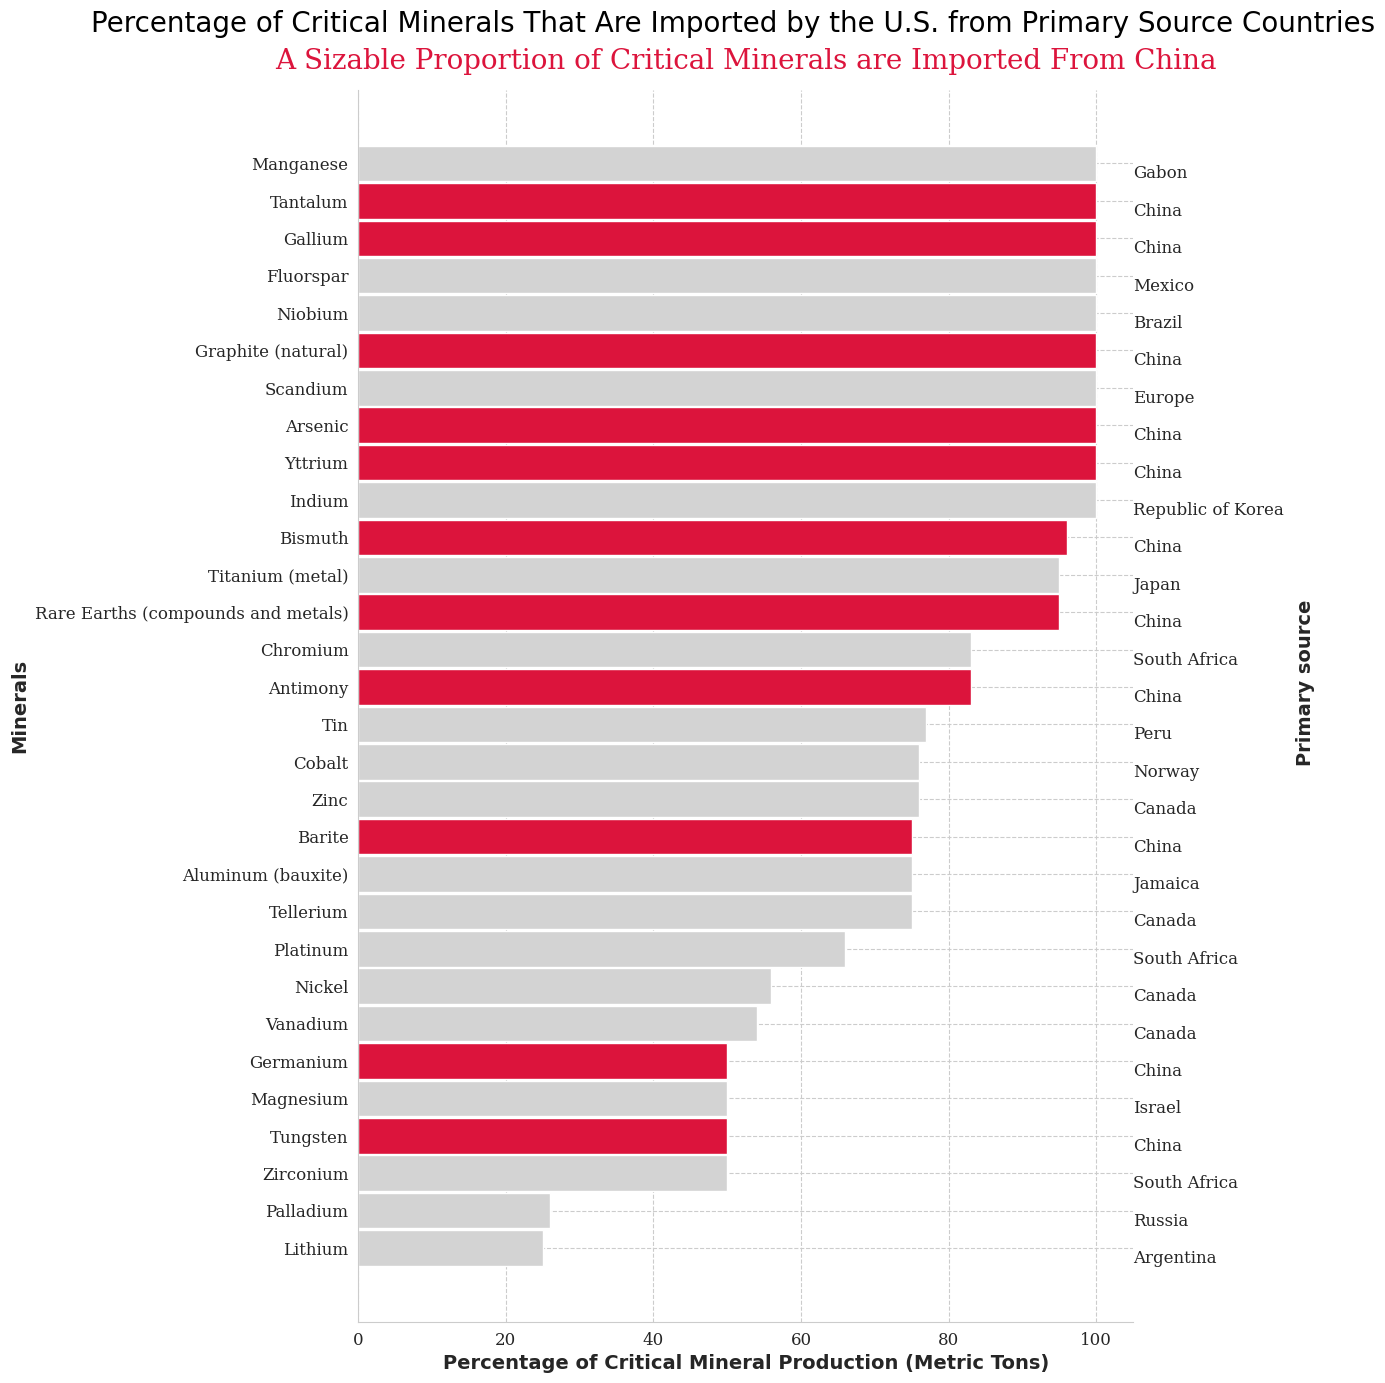

In [ ]:
#fig, ax1 = plt.subplots(figsize=(10,16))
plt.figure(figsize=(10,16))
#ax2 = ax1.twinx()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
values = data['primary_source']
colors = ['crimson' if source == 'China' else 'lightgray' for source in data['primary_source']]
plt.barh(data['mineral'], data['reliance'], color = colors, height = .95)
for i, value in enumerate(values):
    plt.text(105, i-.5 , str(value), ha='left', va='bottom', size = 12,fontdict={'family':'serif'})
plt.text(127, 13, 'Primary source', rotation=90, fontsize=14, weight='bold')
plt.xticks(font = 'serif', size = 12 )
plt.yticks(font = 'serif', size = 12 )
sns.despine(left= False, bottom=False)
plt.xlabel("Percentage of Critical Mineral Production (Metric Tons)", fontsize=14, weight='bold')
plt.ylabel("Minerals", fontsize=14, weight='bold')
#plt.ylabel("Country", fontsize=11)
plt.suptitle("Percentage of Critical Minerals That Are Imported by the U.S. from Primary Source Countries", fontsize=20, y=0.93, color='#000000')
plt.title("A Sizable Proportion of Critical Minerals are Imported From China", fontsize=20, fontdict={'family':'serif'}, color='crimson', y=1.01)
plt.show()

In [ ]:
china_counts = len(data.loc[data['primary_source']=='China'])
china_counts = len(data.loc[data['primary_source']=='China'])
oth_counts  = data.loc[data['primary_source']!='China']
oth_count = len(oth_counts.loc[oth_counts['primary_source']!='Canada'])
countries = ['China', 'Canada', 'Other']
counts = [china_counts, 4 ,oth_count]



In [ ]:
count = pd.DataFrame(countries, counts)
count = count.reset_index()

In [ ]:
count.columns = ['values','country']

In [ ]:
count = count.sort_values(by = 'values')

<BarContainer object of 3 artists>

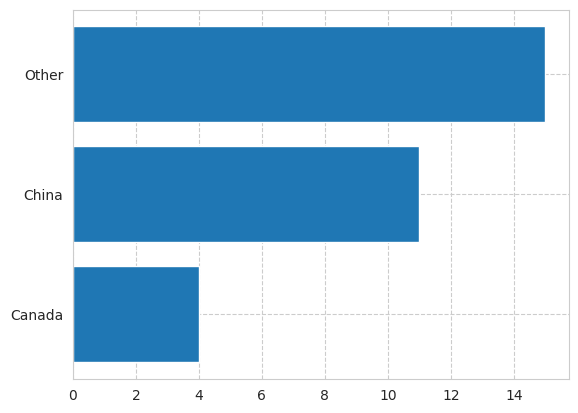

In [ ]:
plt.barh(count['country'], count['values'])

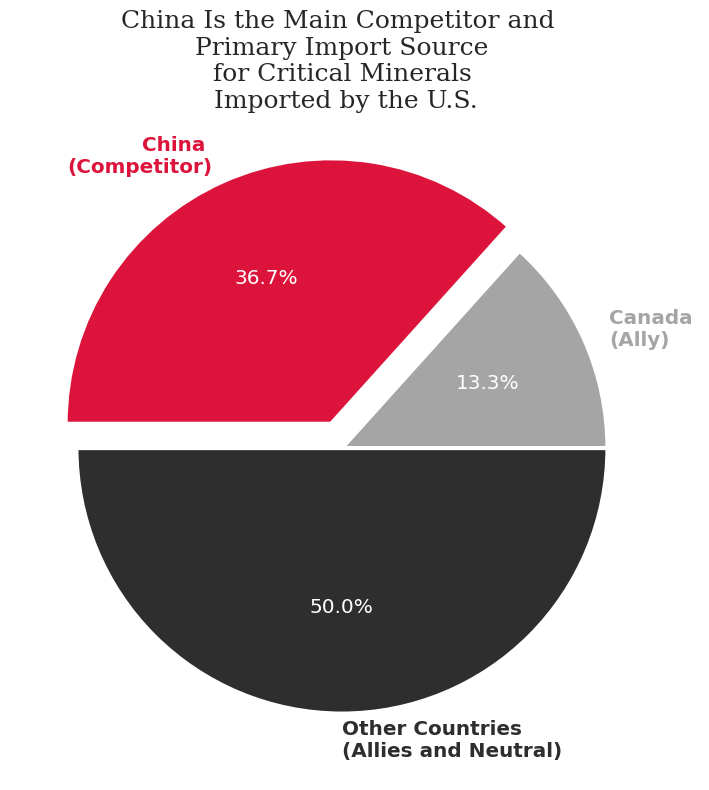

In [ ]:

fig, ax = plt.subplots(figsize=(8, 8))

# Get four different grey colors.
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(count['values']))))
# Swap in a bright blue for the Lacrosse color.
colors[1] = 'Crimson'

# You could also just manually assign colors very easily.
# colors = ['purple', 'black', 'pink', 'aqua']
lbs = [ 'Canada \n(Ally)','China \n(Competitor)', 'Other Countries \n(Allies and Neutral)']
patches, texts, pcts = ax.pie(
    count['values'], labels=lbs, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=0,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0, 0.1, 0))

for i, patch in enumerate(patches):
  # You could also do something like this if you want to assign colors
  # by some rule or by value.
  # if texts[i].get_text() == 'Lacrosse':
  #   patch.set_facecolor('dodgerblue')
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title('China Is the Main Competitor and \n Primary Import Source \n for Critical Minerals \n Imported by the U.S.', fontsize=18, fontdict={'family': 'serif'})
plt.tight_layout()

In [ ]:
trade = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/Where-do-minerals-come-from/main/us%20china%20import%20export%20-%20Sheet1.csv')
trade['export'] = trade['export'].str.replace(',','').astype(int)
trade['import'] = trade['import'].str.replace(',','').astype(int)

In [ ]:
trade.head()


,year,import,export
0,1999,84637,17707
1,2000,103340,21862
2,2001,105886,25025
3,2002,129404,28363
4,2003,156976,34628


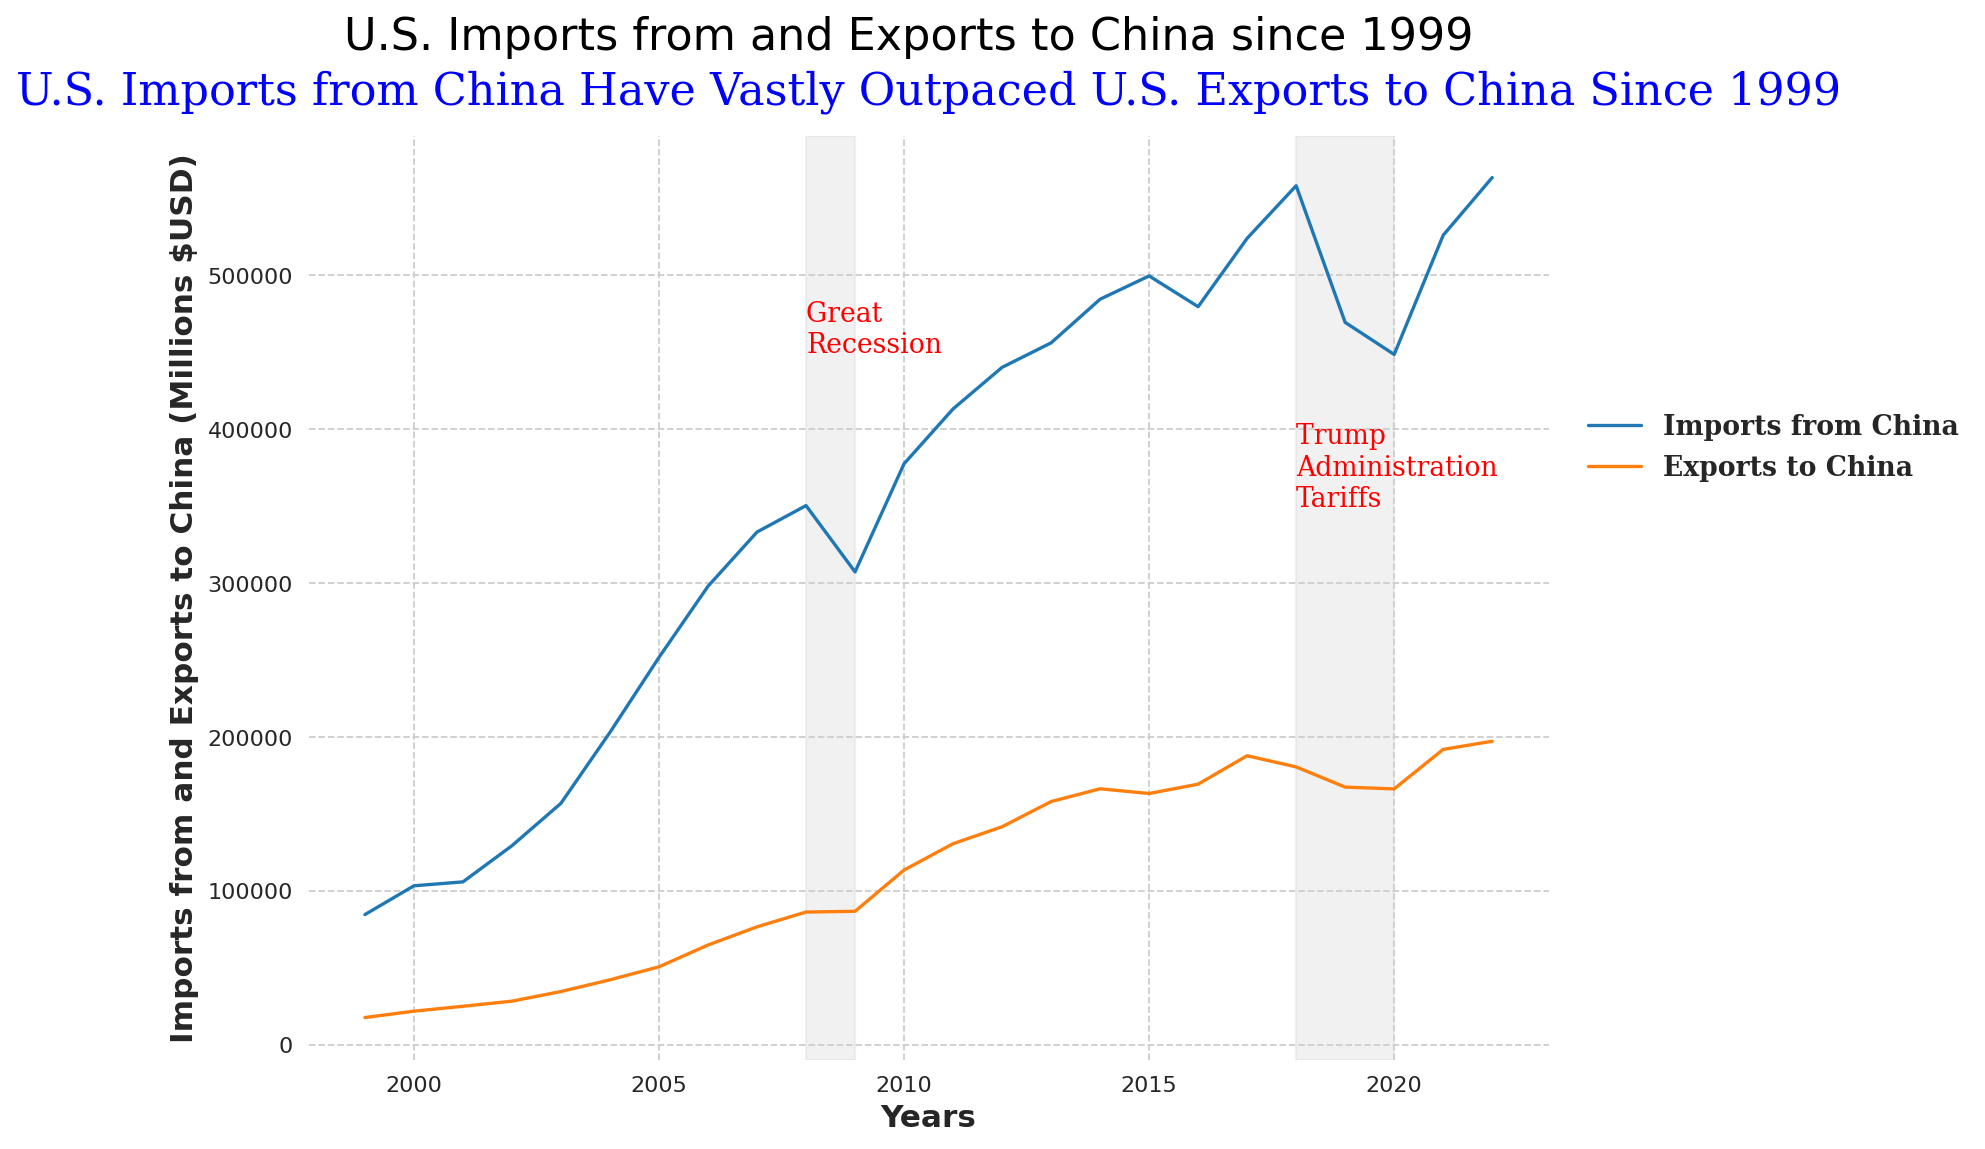

In [ ]:
fig =plt.figure(figsize=(10,7.5), dpi=160)
plt.plot(trade['year'], trade['import'], label = 'Imports from China')
plt.plot(trade['year'], trade['export'], label = 'Exports to China')
plt.axvspan(2018, 2020, color="lightgray", alpha=0.3)
plt.axvspan(2008, 2009, color="lightgray", alpha=0.3)
plt.text(2008, 450000, "Great \nRecession",fontdict={ 'size':12,'family':'serif', 'color':'red'})
plt.text(2018
         , 350000, "Trump \nAdministration \nTariffs",fontdict={ 'size':12,'family':'serif', 'color':'red'})
plt.legend(bbox_to_anchor=(1.35,.6),loc='lower right',prop={'weight':'bold','size':12,'family':'serif'}, frameon=False)
plt.xlabel("Years", fontsize=14, weight='bold')
plt.ylabel("Imports from and Exports to China (Millions $USD)", fontsize=14, weight='bold')
plt.suptitle("U.S. Imports from and Exports to China since 1999", fontsize=20, color='#000000')
plt.title("U.S. Imports from China Have Vastly Outpaced U.S. Exports to China Since 1999", fontsize=20, fontdict={'family': 'serif'}, color='blue', y=1.02)
sns.despine( bottom=True, right = True, left = True)
plt.show()

In [ ]:
china_exports = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/Where-do-minerals-come-from/main/china%20exports%20-%20Sheet1.csv')

In [ ]:
china_exports = china_exports.head(18)
china_exports

,country,usd,year,percent
0,United States,582.76,2022,0.165955
1,Hong Kong,297.54,2022,0.084732
2,Japan,172.93,2022,0.049246
3,South Korea,162.62,2022,0.046310
4,Vietnam,146.96,2022,0.041850
5,India,118.50,2022,0.033746
6,Netherlands,117.73,2022,0.033526
7,Germany,116.23,2022,0.033099
8,Malaysia,93.71,2022,0.026686
9,United Kingdom,81.54,2022,0.023220


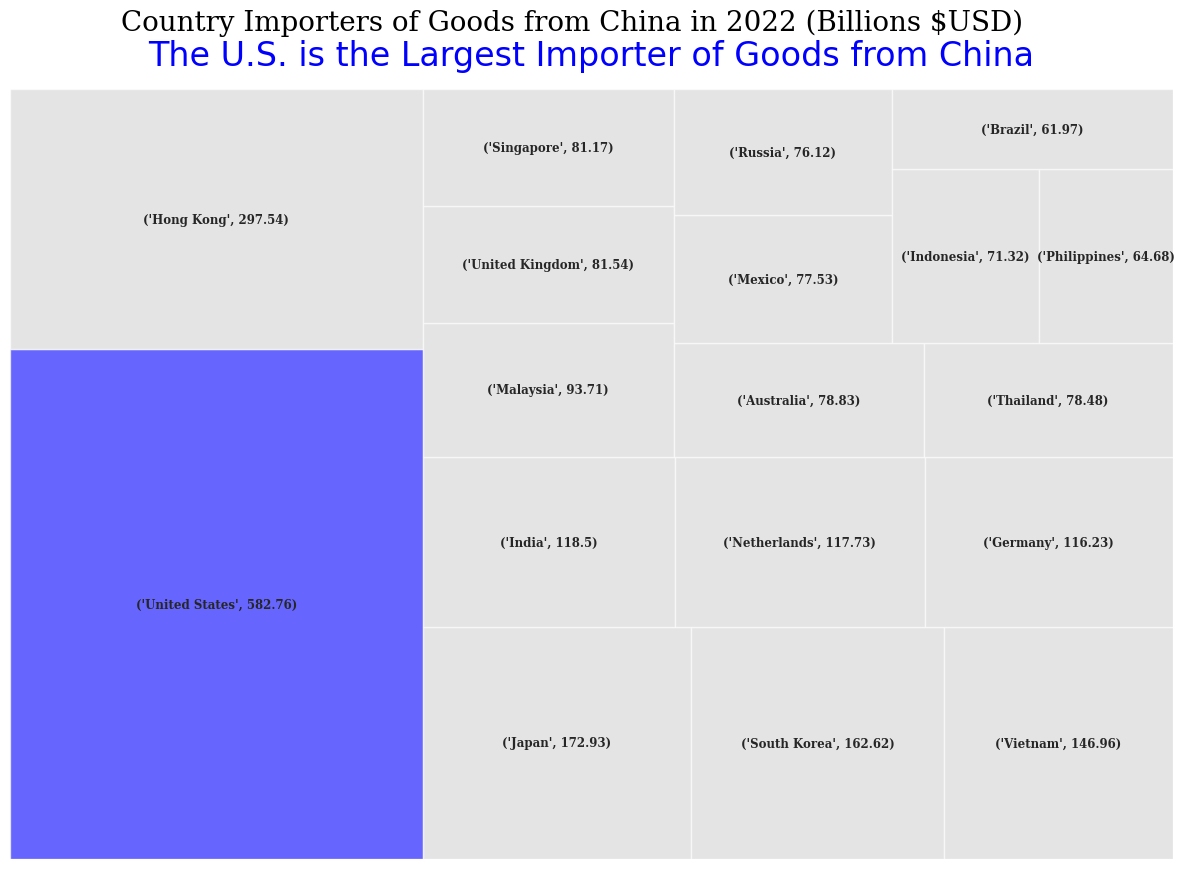

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= china_exports['percent'].values# proportions of the categories
#ls=china_exports['country']
#label = [ls[i] if  source >= .01 else '' for source in china_exports['percent']]
colors = ['blue' if source == 'United States' else 'lightgray' for source in china_exports['country']]
ls = china_exports['country']
label = [(country, percent) if percent >= 55 else '' for country, percent in zip(ls, china_exports['usd'])]

squarify.plot(sizes=sizes, label=label,text_kwargs={'fontsize':8.5, 'fontfamily':"serif",'weight':'bold'},  alpha=0.6, color=colors)
plt.suptitle("Country Importers of Goods from China in 2022 (Billions $USD)",  fontsize=20, fontdict={'family': 'serif'}, color='#000000', y=0.96)
plt.title("The U.S. is the Largest Importer of Goods from China",  fontsize=24, fontdict={'family': 'Helvetica'}, color='blue', y=1.02)
plt.axis('off')
plt.show()

In [ ]:
label

[('United States', 582.76),
 ('Hong Kong', 297.54),
 ('Japan', 172.93),
 ('South Korea', 162.62),
 ('Vietnam', 146.96),
 ('India', 118.5),
 ('Netherlands', 117.73),
 ('Germany', 116.23),
 ('Malaysia', 93.71),
 ('United Kingdom', 81.54),
 ('Singapore', 81.17),
 ('Australia', 78.83),
 ('Thailand', 78.48),
 ('Mexico', 77.53),
 ('Russia', 76.12),
 ('Indonesia', 71.32),
 ('Philippines', 64.68),
 ('Brazil', 61.97),
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

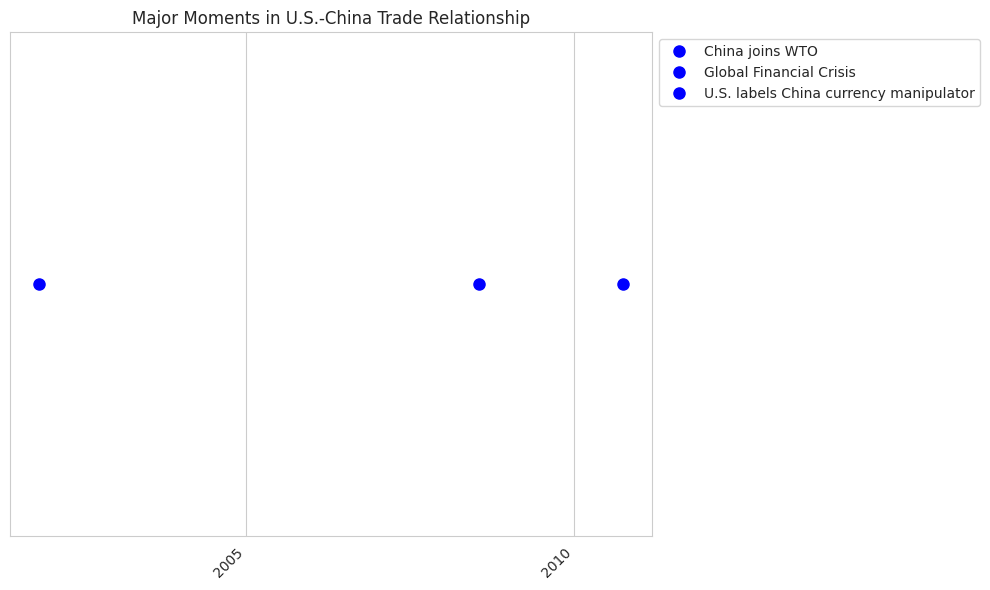

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Sample data for major moments
events = [
    {'date': '2001-11-10', 'event': 'China joins WTO'},
    {'date': '2008-07-21', 'event': 'Global Financial Crisis'},
    {'date': '2010-09-29', 'event': 'U.S. labels China currency manipulator'},
    # Add more events as needed
]

# Convert date strings to datetime objects
for event in events:
    event['date'] = datetime.strptime(event['date'], '%Y-%m-%d')

# Sort events by date
events.sort(key=lambda x: x['date'])

# Plotting the timeline
fig, ax = plt.subplots(figsize=(10, 6))

for event in events:
    ax.plot(event['date'], 0, marker='o', markersize=8, label=event['event'], linestyle='None', color='blue')

# Customize x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')

# Remove y-axis ticks and labels
ax.yaxis.set_visible(False)

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a title
plt.title('Major Moments in U.S.-China Trade Relationship')

plt.tight_layout()
plt.show()


<ipython-input-24-a25b981cfe70>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


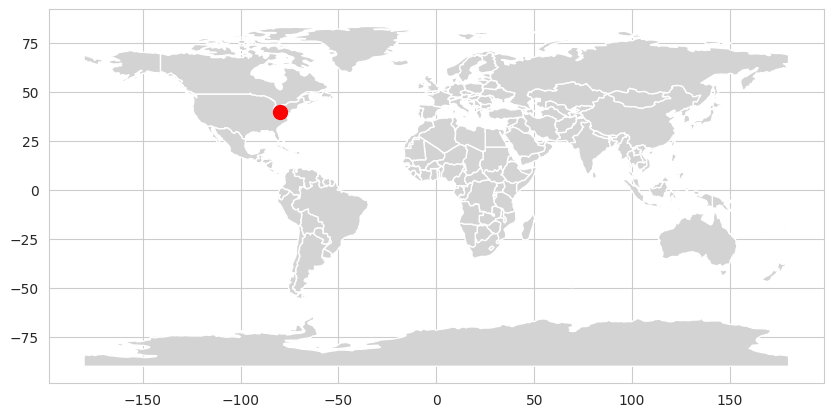

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame for the bar location (you can customize this based on your data)
bar_location = gpd.GeoDataFrame(geometry=gpd.points_from_xy([-80], [40]))

# Plot the world map
world.plot(figsize=(10, 6), color='lightgrey')

# Plot the bar on top of the map
bar_location.plot(ax=plt.gca(), color='red', marker='o', markersize=100)

plt.show()


<ipython-input-25-543ab63134ef>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


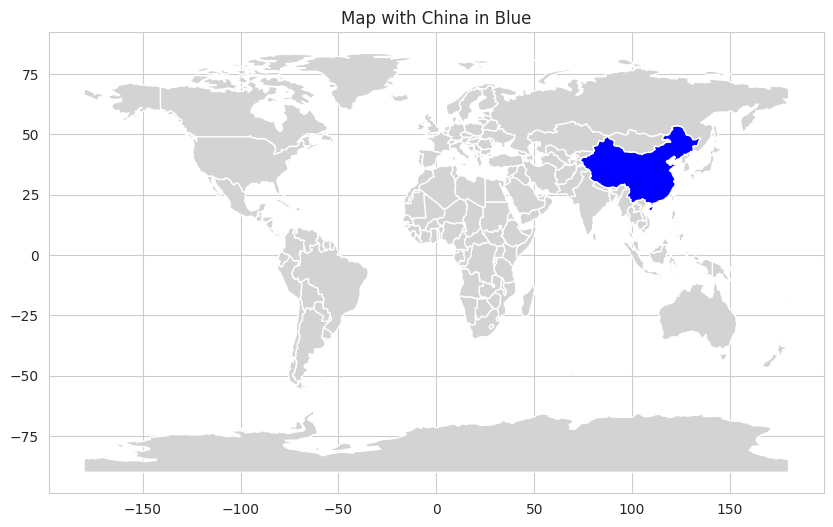

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Select a specific country (e.g., China)
target_country = 'China'
selected_country = world[world['name'] == target_country]

# Plot the world map with all countries in light grey
world.plot(figsize=(10, 6), color='lightgrey')

# Plot the selected country in a different color (e.g., blue)
selected_country.plot(ax=plt.gca(), color='blue')

plt.title(f'Map with {target_country} in Blue')
plt.show()


In [ ]:
china_exports = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/Where-do-minerals-come-from/main/china%20exports%20-%20Sheet1.csv')